# Recorrido de Grafos
        


In [2]:
class abstract_graph:
    
    def __init__(self,_edges):
        self.edges=_edges
        self.nodes={u for u,v in self.edges} | {v for u,v in self.edges}
    
    def adjacency_list(self):
        pass
    
class simple_graph(abstract_graph):
    
    def __init__(self,_edges):
        self.edges=_edges
        self.nodes={u for u,v in self.edges} | {v for u,v in self.edges}
        
    
    def adjacency_list(self):
        adjacent=lambda n : {v for u,v in self.edges if u==n } | {u for u,v in self.edges if v==n}
        return {v:adjacent(v) for v in self.nodes}

    
class simple_digraph(abstract_graph):
    
    def __init__(self,_edges):
        self.edges=_edges
        self.nodes={u for u,v in self.edges if u!=None} | {v for u,v in self.edges if v!=None}
        
    def adjacency_list(self):
        adjacent=lambda n : {v for u,v in self.edges if u==n and v!=None} 
        return {v:adjacent(v) for v in self.nodes} 
    
    def in_degree(self):
        degree= lambda n : len({u for u,v in self.edges if v==n and u!=None})
        return {v:degree(v) for v in self.nodes}

In [5]:
import numpy as np
random_graph = lambda n,p : {(int(u),int(v)) for u in np.arange(n) for v 
                    in np.arange(n) if np.random.rand()>p and u!=v}
# cantidad de vértices
n=5e2
# 1- probabilidad de crear aristas
p=0.9

E=random_graph(n,p)
G=simple_digraph(E)

print(len(G.nodes))
#print G.adjacency_list()

500


In [7]:
U=list()
U.append(1)
U.append(2)
U.append(3)
U.append(4)
U.pop(0)

1

In [8]:
# https://eddmann.com/posts/depth-first-search-and-breadth-first-search-in-python/
import time
from collections import deque

def dfs(graph, start):
    visited, stack, path = set(), [start],[]
    while stack:
        vertex = stack.pop()
        if vertex not in visited:
            visited.add(vertex)
            path.append(vertex)
            stack.extend(graph[vertex] - visited)
    return path

def bfs(graph, start):
    visited, queue, path = set(), [start],[]
    while queue:
        vertex = queue.pop(0)
        if vertex not in visited:
            visited.add(vertex)
            path.append(vertex)
            queue.extend(graph[vertex] - visited)
    return path

def bfs2(graph, start):
    visited, queue, path = set(), deque([start]),[]
    while queue:
        vertex = queue.popleft()
        if vertex not in visited:
            visited.add(vertex)
            path.append(vertex)
            queue.extend(graph[vertex] - visited)
    return path


start=time.clock()
bfs(G.adjacency_list(),1)
end=time.clock()-start
print('Tiempo BFS: {0:.2f}[s]'.format(end))
start=time.clock()
bfs2(G.adjacency_list(),1)
end=time.clock()-start
print('Tiempo BFS Queue: {0:.2f}[s]'.format(end))
start=time.clock()
dfs(G.adjacency_list(),1)
end=time.clock()-start
print('Tiempo DFS: {0:.2f}[s]'.format(end))


Tiempo BFS: 2.14[s]
Tiempo BFS Queue: 1.72[s]
Tiempo DFS: 1.94[s]


In [10]:
import timeit

print(timeit.timeit(stmt='l.pop(0)',setup='l = list(range(100000))',number=99999))
print(timeit.timeit(setup='import collections; l = collections.deque(range(100000))', stmt='l.popleft()', number=99999))

0.8864448960000573
0.006882628999960616


In [11]:
graph = {'A': set(['B', 'C']),
         'B': set(['A', 'D', 'E']),
         'C': set(['A', 'F']),
         'D': set(['B']),
         'E': set(['B', 'F']),
         'F': set(['C', 'E'])}

def tree_path(parents,start):
    path=[end]
    k=end
    while k is not None:
        path.append(parent[k])
        k=parent[k]
    return path[:-1][::-1]

print('DFS:',dfs(graph,'A'))
print('BFS:',bfs(graph,'A'))
print('BFS:',bfs2(graph,'A'))

DFS: ['A', 'C', 'F', 'E', 'B', 'D']
BFS: ['A', 'B', 'C', 'E', 'D', 'F']
BFS: ['A', 'B', 'C', 'E', 'D', 'F']


In [65]:
E=[('A','B'),('A','C'),('C','F'),('B','D'),('B','E'),('E','F')]
graph=simple_digraph(E)

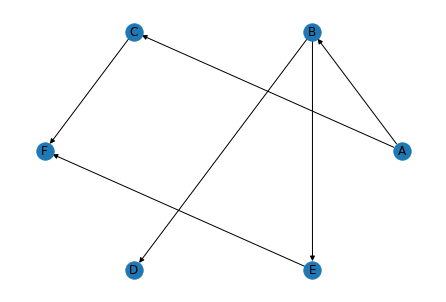

In [66]:

import networkx as nx
import matplotlib.pyplot as plt

G_nx=nx.DiGraph()
G_nx.add_edges_from(E)
pos = nx.circular_layout(G_nx)  # positions for all nodes
nx.draw(G_nx,with_labels=True,pos=pos)
labels = nx.get_edge_attributes(G_nx,'weight')
nx.draw_networkx_edge_labels(G_nx,pos,edge_labels=labels)

plt.show()

In [67]:
nx.find_cycle(G_nx)

NetworkXNoCycle: ignored

In [68]:
def topological_sort(graph):
    topology = []
    degree = graph.in_degree()
    adj=graph.adjacency_list()
    stack=[key for (key,value) in degree.items() if value==0]   
    while stack:
        vertex = stack.pop()
        topology.append(vertex)
        for m in adj[vertex]:
            degree[m] -= 1
            if not degree[m]:
                stack.append(m)
    if len(topology) < len(graph.nodes):
        raise ValueError('graph contains cycle')
    return topology




In [69]:
T=topological_sort(graph)

In [70]:
T

['A', 'C', 'B', 'D', 'E', 'F']

In [78]:
import time
import os
import random
from multiprocessing import Process, Queue, Lock


def producer(queue, lock, names):
    with lock:
        print('Starting producer => {}'.format(os.getpid()))
    for name in names:
        queue.put(name)
    with lock:
        print('Producer {} exiting...'.format(os.getpid()))

def consumer(queue, lock):
    with lock:
        print('Starting consumer => {}'.format(os.getpid()))
    while True:
        name = queue.get()
        with lock:
            print('Process {} got {}'.format(os.getpid(), name))

            
def parallel_topological_sort(graph):
    degree = graph.in_degree()
    adj=graph.adjacency_list()
    lock = Lock()
    producers = []
    consumers = []
    names=[key for (key,value) in degree.items() if value==0]
    #names = [['F', 'G'],
    #         ['A', 'B', 'C', 'D', 'E']]
    queues = [Queue() for n in names]
    for i,n in enumerate(names):
        producers.append(Process(target=producer, args=(queues[i], lock, n)))

    for q in queues:
        p = Process(target=consumer, args=(q, lock))
        p.daemon = True
        consumers.append(p)

    for p in producers:
        p.start()

    for c in consumers:
        c.start()

    for p in producers:
        p.join()



In [79]:
parallel_topological_sort(graph)

Starting producer => 626
Starting consumer => 629
Producer 626 exiting...
Process 629 got A


In [77]:
graph.in_degree()

{'A': 0, 'B': 1, 'C': 1, 'D': 1, 'E': 1, 'F': 2}

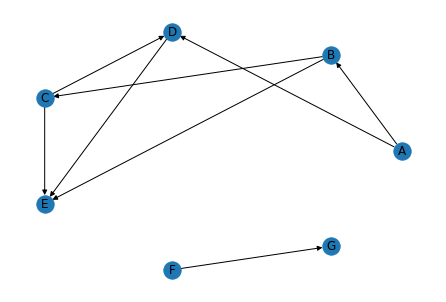

In [81]:
E=[('A', 'B'),('A', 'D'),('B', 'C'),('B', 'E'),('C', 'D'),('C', 'E'),('D', 'E'),('F', 'G')]
G=simple_digraph(E)

G_nx=nx.DiGraph()
G_nx.add_edges_from(E)
pos = nx.circular_layout(G_nx)  # positions for all nodes
nx.draw(G_nx,with_labels=True,pos=pos)
labels = nx.get_edge_attributes(G_nx,'weight')
nx.draw_networkx_edge_labels(G_nx,pos,edge_labels=labels)

plt.show()

In [82]:
print(G.adjacency_list())
print(G.in_degree())
L=topological_sort(G)
print('Orden topologico',L)

LP=parallel_topological_sort(G)
#print('Orden topologico paralelo',LP)

{'B': {'E', 'C'}, 'C': {'E', 'D'}, 'G': set(), 'E': set(), 'D': {'E'}, 'F': {'G'}, 'A': {'B', 'D'}}
{'B': 1, 'C': 1, 'G': 1, 'E': 3, 'D': 2, 'F': 0, 'A': 0}
Orden topologico ['A', 'B', 'C', 'D', 'E', 'F', 'G']
Starting producer => 682
Starting producer => 685
Starting consumer => 686
Producer 682 exiting...
Starting consumer => 687
Process 687 got A
Process 686 got F
Producer 685 exiting...


In [ ]:
G.nodes

{'A', 'B', 'C', 'D', 'E', 'F', 'G'}

# Resolución de Dependencias de Software


En esta tarea Ud. debe utilizar el algoritmo de ordenamiento topologico para implementar un gestor de paquetes para Python. De manera de instalar un paquete dado, el gestor de paquete debe analizar las dependencias. Las dependencias forman un grafo dirigido ya que los paquetes sin dependencias pueden ser instalados primero hasta completar la lista completa de dependencias.

Un problema común de los gestores de paquetes son las dependencias circulares :



$ pipdeptree
Warning!!! Cyclic dependencies found:
- CircularDependencyA => CircularDependencyB => CircularDependencyA
- CircularDependencyB => CircularDependencyA => CircularDependencyB

$ pipdeptree --json-tree > dependencias.json

Por lo tanto, de manera de convertir la lista de dependencias en un grafo acíclico dirigido (DAG), se debe eliminar este tipo de dependencias así como también los otros ciclos que puedan aparecer.

En particular, se debe entregar un informe con las siguientes actividades:

    1.) Convertir archivo JSON de dependencias de software en un DAG (eliminando ciclos).
    2.) Implementar ordenamiento topológico sobre el DAG para obtener la secuencia de instalación de los paquetes que satisface las dependencias.
    3.) **Extra**  Implementar un instalador paralelo. 
    
[Fuente](https://ipython-books.github.io/143-resolving-dependencies-in-a-directed-acyclic-graph-with-a-topological-sort/)


In [84]:
!wget https://raw.githubusercontent.com/sherna90/analisis_algoritmos/master/data/dependencias.json

--2020-11-17 12:20:29--  https://raw.githubusercontent.com/sherna90/analisis_algoritmos/master/data/dependencias.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 398590 (389K) [text/plain]
Saving to: ‘dependencias.json’

dependencias.json   100%[===================>] 389.25K  --.-KB/s    in 0.04s   

2020-11-17 12:20:30 (8.99 MB/s) - ‘dependencias.json’ saved [398590/398590]



In [86]:
import json

with open('dependencias.json') as json_file:
    data=json.load(json_file)
    
print(json.dumps(data,indent=4,sort_keys=True))

[
    {
        "dependencies": [],
        "installed_version": "0.3.4",
        "key": "adium-theme-ubuntu",
        "package_name": "adium-theme-ubuntu",
        "required_version": "0.3.4"
    },
    {
        "dependencies": [],
        "installed_version": "3.8.11.1.post1",
        "key": "apsw",
        "package_name": "apsw",
        "required_version": "3.8.11.1.post1"
    },
    {
        "dependencies": [
            {
                "dependencies": [],
                "installed_version": "0.16.0",
                "key": "future",
                "package_name": "future",
                "required_version": ">=0.15.2"
            },
            {
                "dependencies": [],
                "installed_version": "1.15.3",
                "key": "numpy",
                "package_name": "numpy",
                "required_version": ">=1.12"
            }
        ],
        "installed_version": "1.2",
        "key": "autograd",
        "package_name": "autograd",
       

In [88]:
import subprocess
import sys
import multiprocessing

def install(package):
    subprocess.call([sys.executable, "-m", "pip", "install", package])
    
class task_scheduler:
    
    def __init__(self,_edges):
        self.edges=_edges
        self.di_graph=simple_digraph(_edges)
    
    def serial_processing(self):
        L=topological_sort(self.di_graph)
        return L

E=[('numpy', 'autograd'),('future', 'autograd')]
scheduler=task_scheduler(E)
for i,task in enumerate(scheduler.serial_processing()):
    print(i,task)

0 future
1 numpy
2 autograd
